<a href="https://colab.research.google.com/github/J-Nobull/Noble_ANA-680_FINAL/blob/main/Noble_ANA680_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data file and run initial inspection

In [2]:
    # Load the dataset
health_import = pd.read_csv('HEALTH.csv')

    # Inspect
print(health_import.info())
print(health_import.tail())
print(health_import.describe())
print(health_import.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Find variables that have more than 12 unique values  
Will consolidate categories as able

In [3]:
    # Display unique values for categorical columns (up to 12 values)
categorical_columns = health_import.select_dtypes(include=['object']).columns
for col in categorical_columns:
   print(f"\nUnique values in {col}: {health_import[col].unique()[:12]}")


Unique values in Timestamp: ['8/27/2014  11:29: AM' '8/27/2014 11:29' '8/27/2014 11:30'
 '8/27/2014 11:31' '8/27/2014 11:32' '8/27/2014 11:33' '8/27/2014 11:34'
 '8/27/2014 11:35' '8/27/2014 11:36' '8/27/2014 11:37' '8/27/2014 11:38'
 '8/27/2014 11:39']

Unique values in Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?']

Unique values in Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia']

Unique values in state: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC']

Unique values in self_employed: [nan 'Yes' 'No']

Unique values in family_history: ['No' 'Yes']

Unique values in treatment: ['Yes' 'No']

Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' nan]

Unique values in no_employees: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']

Unique values in remote_work:

INSPECT 'comments'  
The question has very few responses (13%) and very few ADD to the mental health picture: DROP  
  
INSPECT 'Timestamp'

In [4]:
print(health_import['Timestamp'].head(10)), (health_import['Timestamp'].tail())

0    8/27/2014  11:29: AM
1    8/27/2014  11:29: AM
2    8/27/2014  11:29: AM
3         8/27/2014 11:29
4         8/27/2014 11:30
5         8/27/2014 11:31
6         8/27/2014 11:31
7         8/27/2014 11:32
8         8/27/2014 11:32
9         8/27/2014 11:32
Name: Timestamp, dtype: object


(None,
 1254     9/12/2015 11:17
 1255      9/26/2015 1:07
 1256     11/7/2015 12:36
 1257    11/30/2015 21:25
 1258      2/1/2016 23:04
 Name: Timestamp, dtype: object)

'Timestamp' appears to be WHEN each subject completed the survey.  
Dates range from August 2014 through February 2016.  
Likely kept as the identifier; no value to the feature: DROP

In [5]:
    # Drop undesired columns
health_inspect = health_import.drop(columns=['Timestamp', 'comments'])

INSPECT  'Age'  
8 'Age' values immediatetly stand out as eroneous; in the outlier areas
Will replace all values outside 18 to 72 with mean value

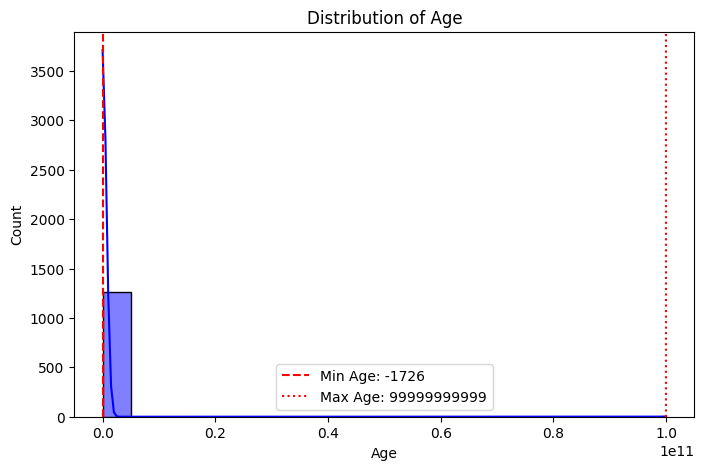

In [6]:
    # Identify the minimum and maximum values in the 'Age' column
min_age = health_inspect['Age'].min()
max_age = health_inspect['Age'].max()

    # Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.axvline(min_age, color='red', linestyle='dashed', label=f"Min Age: {min_age}")
plt.axvline(max_age, color='red', linestyle='dotted', label=f"Max Age: {max_age}")
plt.legend()
plt.show()

99999999999 and 329 are obvious errors  
6 values less than 12 (including 3 negative, e.g. -1726) will also be replaced  
No other eroneous values appear in these records: will NOT DROP

count    1259.000000
mean       32.073868
std         7.265580
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


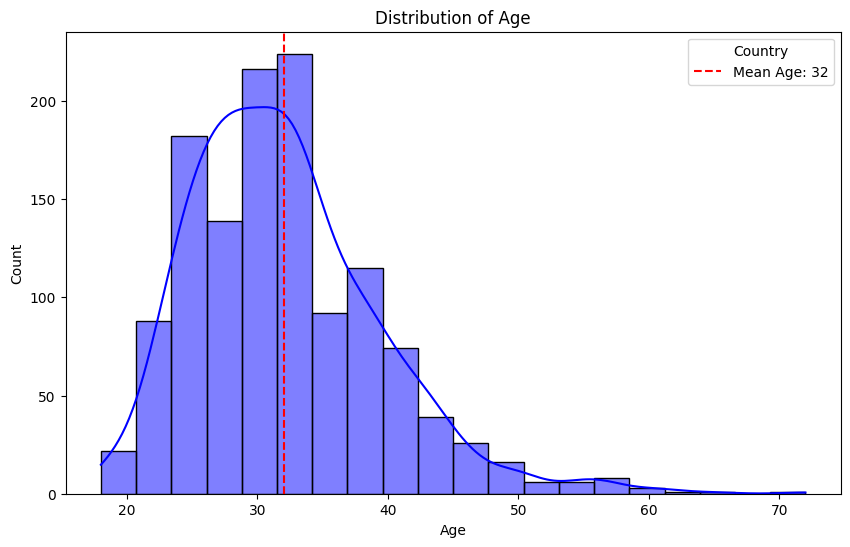

In [7]:
   # Ensure all ages are positive (change -29 to 29)
health_inspect['Age'] = health_inspect['Age'].abs()

    # Get mean of ages 18 to 72
test_1 = health_inspect[(health_inspect['Age'] > 17) & (health_inspect['Age'] < 73)]
mean_age = int(test_1['Age'].mean())

    # Replace all outliers (17>Age<73) with the mean
health_inspect.loc[(health_inspect['Age'] < 17) | (health_inspect['Age'] > 73), 'Age'] = mean_age

    # Confirm
print(health_inspect['Age'].describe())

    # Plot cleaned Age distribution
plt.figure(figsize=(10,6))
sns.histplot(health_inspect['Age'], bins=20, kde=True, color="blue")
plt.title("Corrected Distribution of Age")
plt.xlabel("Age")
plt.axvline(mean_age, color='red', linestyle='dashed', label=f"Mean Age: {mean_age}")
plt.ylabel("Count")
plt.legend(title='Country')
plt.show()

INSPECT 'Gender', stands out as needing inspection  
Keep all reports when reducing to minimal categories

In [8]:
    # Gender has over 12 values listed
health_inspect['Gender'].value_counts(dropna=False).sort_index(ascending=False)

    # Make a copy to progress
health_transform = health_inspect.copy()

    # Transform gender into three groups: '0', '1', '2'
def categorize_gender(value):
    # Normalize strings
   value = str(value).strip().lower()

    # Define known male / female identifiers, categorize undefined or ambiguous gender values
   female_cat = {'female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake',
                         'femail', 'female (cis)'}
   male_cat = {'male', 'm', 'man', 'cis male', 'cis man', 'malr', 'mal', 'mail',
                        'make', 'msle', 'maile', 'male-ish', 'male (cis)', 'something kinda male?',
                        'ostensibly male, unsure what that really means', 'male leaning androgynous',
                        'Guy (-ish) ^_^', }

   if value in female_cat: return '1'
   elif value in male_cat: return '0'  # males will seek treatment less, =0 keeps coef positive
   else:                   return '2'

    # Apply the categorization to the Gender column
health_transform.loc[:, 'Gender'] = health_transform['Gender'].apply(categorize_gender)

    # Confirm
health_transform['Gender'].value_counts().sort_index()

,count
Gender,
0,994
1,247
2,18


The goal is to coidentify conditions leading to seeking treatment, this is likely to affect outcome.  
the 18 Gender reports (neither Male, nor Female): do NOT DROP  
keep as Other(2)  

INSPECT 'Country'

         Count  Percentage
Country                   
1          751   59.650516
0          508   40.349484


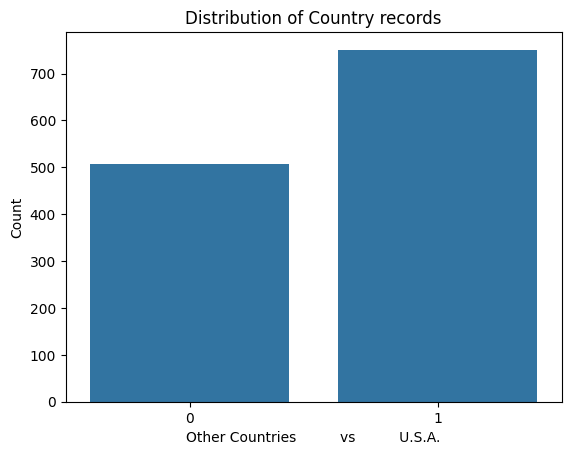

In [9]:
    # Alter 'Country': US -> 1, all Other -> 0
health_transform['Country'] = health_transform['Country'].apply(lambda x: 1 if x == 'United States' else 0)
health_transform['Country'] = health_transform['Country'].astype('category')

    # Replace NA values in 'state' with 'XX'
health_transform['state'] = health_transform['state'].fillna('XX')

    # Combine for display
country_counts = health_transform['Country'].value_counts()
country_percent = (country_counts / country_counts.sum()) * 100
country_stats = pd.DataFrame({'Count': country_counts, 'Percentage': country_percent})

    # Confirm
print(country_stats)

   # Display
sns.countplot(x='Country', data=health_transform)
plt.title("Distribution of Country records")
plt.xlabel("Other Countries          vs          U.S.A.")
plt.ylabel("Count")
plt.show()

INSPECT 'self_employed'

In [10]:
    # Change missing values in 'self_employed' to 'No'; employed by "tech company"
health_transform.fillna({'self_employed': 'No'}, inplace=True)

    # Confirm
health_transform['self_employed'].value_counts(dropna=False)

,count
self_employed,
No,1113
Yes,146


INSPECT 'work_interfere'  
interpolate missing values

In [11]:
   # With 260 NA, do not want to drop all, convert for interpolation
work_interfere_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}

    # Convert to numerical values for interpolation
health_transform['work_interfere'] = health_transform['work_interfere'].map(work_interfere_map)

    # Perform linear interpolation
health_transform['work_interfere'] = health_transform['work_interfere'].interpolate(method='linear')

    # Convert to ordered categorical
health_transform['work_interfere'] = pd.Categorical(
    health_transform['work_interfere'].round().astype(int),
    categories=[0, 1, 2, 3],
    ordered=True)

    # Confirm
print(health_transform['work_interfere'].isna().sum())
print(health_transform['work_interfere'].dtype)

0
category


Fix 'no_employees' and prepare categories for dummy variables

In [12]:
    # Correct misinterpreted values in number of employees
health_transform['no_employees'] = health_transform['no_employees'].replace({
    '5-Jan': '1-5',
    '25-Jun': '6-25'})

    # Define mapping based on below rules
employee_category_map = {'1-5': 0, '6-25': 0,                 # SMALL : 1-25 employees→ 0
                         '26-100': 1, '100-500': 1,           # MEDIUM : 26-500 employees→ 1
                         '500-1000': 2, 'More than 1000': 2}  # LARGE : 500+ employees→ 2

    # Convert 'no_employees'
health_transform['no_employees'] = health_transform['no_employees'].map(employee_category_map)

    # Keep as ordered categorical
health_transform['no_employees'] = pd.Categorical(
    health_transform['no_employees'],
    categories=[0, 1, 2],
    ordered=True)

# Confirm
health_transform['no_employees'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=True, categories_dtype=int64)

INSPECT 'leave'

In [13]:
    # Convert to ordered categorical
health_transform['leave'] = pd.Categorical(
    health_transform['leave'],
    categories=["Don't know", "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult"],
    ordered=True)

    # Rename categories
leave_mapping = {
    "Don't know": 0,
    "Very easy": 1,
    "Somewhat easy": 2,
    "Somewhat difficult": 3,
    "Very difficult": 4}

health_transform['leave'] = health_transform['leave'].cat.rename_categories(leave_mapping)

INSPECT remaining variables and prepare categories for dummy variables

In [14]:
    # Change 'Don't know' and 'Not sure' to 'No'
    # Questions similar to "Do you know the options for mental health care your employer provides?"
health_transform = health_transform.map(
    lambda x: 'No' if isinstance(x, str) and x.strip().lower() in ["don't know", "not sure"] else x)

    # Change 'Some of them' to 'Yes'
    # Questions similar to "Willing to discuss your mental health with a supervisor?"
health_transform = health_transform.map(
    lambda x: 'Yes' if isinstance(x, str) and x.strip().lower() in ['some of them'] else x)

    # Change other columns to categorical with Yes/No and a few Maybe
bi_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company',
              'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
              'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview',
              'phys_health_interview', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence']

    # To fix warning
pd.set_option('future.no_silent_downcasting', True)

    # Convert Yes/No to 1/0 and Maybe to -1
health_transform[bi_columns] = (health_transform[bi_columns]
    .replace({'No': 0, 'Yes': 1, 'Maybe': '-1'})
    .astype('category'))
print(health_transform.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1259 non-null   int64   
 1   Gender                     1259 non-null   object  
 2   Country                    1259 non-null   category
 3   state                      1259 non-null   object  
 4   self_employed              1259 non-null   category
 5   family_history             1259 non-null   category
 6   treatment                  1259 non-null   category
 7   work_interfere             1259 non-null   category
 8   no_employees               1259 non-null   category
 9   remote_work                1259 non-null   category
 10  tech_company               1259 non-null   category
 11  benefits                   1259 non-null   category
 12  care_options               1259 non-null   category
 13  wellness_program           1259 n

In [15]:
    # Convert remaining object columns to categorical
object_columns = health_transform.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
   health_transform[col] = health_transform[col].astype('category')

    # Verify the unique values to confirm the transformation
print(health_transform[bi_columns].nunique())
print(health_transform.info())

self_employed                2
family_history               2
treatment                    2
remote_work                  2
tech_company                 2
benefits                     2
care_options                 2
wellness_program             2
seek_help                    2
anonymity                    2
mental_health_consequence    3
phys_health_consequence      3
mental_health_interview      3
phys_health_interview        3
coworkers                    2
supervisor                   2
mental_vs_physical           2
obs_consequence              2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1259 non-null   int64   
 1   Gender                     1259 non-null   category
 2   Country                    1259 non-null   category
 3   state                      1259 

# Save cleaned datafile

In [16]:
    # Make a final copy of the cleaned dataset
health_clean = health_transform.copy()

    # Confirm
print(health_clean.info())

    # Export
health_clean.to_excel("HEALTH_cleaned.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1259 non-null   int64   
 1   Gender                     1259 non-null   category
 2   Country                    1259 non-null   category
 3   state                      1259 non-null   category
 4   self_employed              1259 non-null   category
 5   family_history             1259 non-null   category
 6   treatment                  1259 non-null   category
 7   work_interfere             1259 non-null   category
 8   no_employees               1259 non-null   category
 9   remote_work                1259 non-null   category
 10  tech_company               1259 non-null   category
 11  benefits                   1259 non-null   category
 12  care_options               1259 non-null   category
 13  wellness_program           1259 n

Display target variable balance

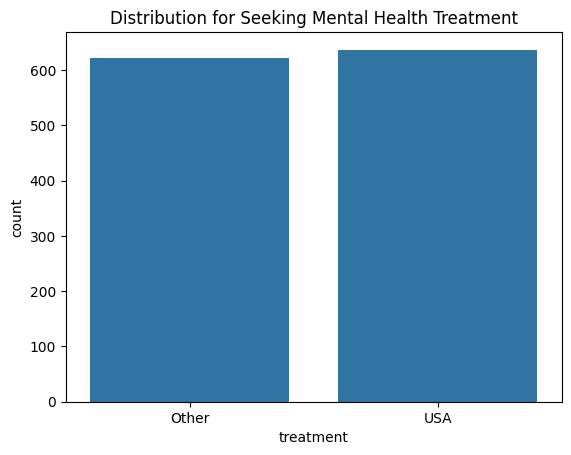

In [17]:
sns.countplot(x='treatment', data=health_clean)
plt.title("Distribution for Seeking Mental Health Treatment")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

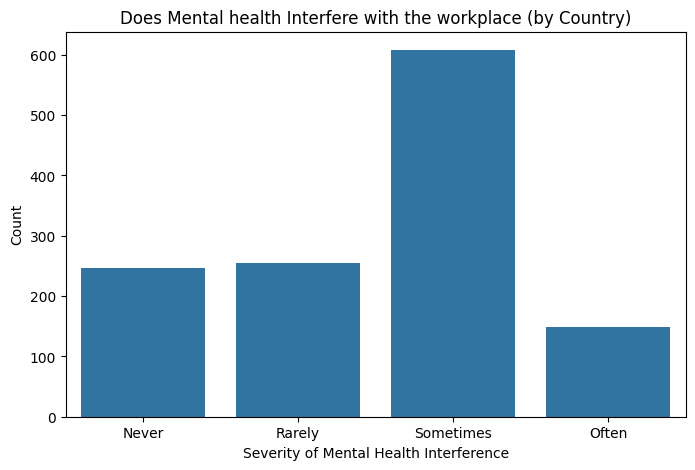

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', data=health_clean)
plt.title("Does Mental health Interfere with the workplace (by Country)")
plt.xlabel("Severity of Mental Health Interference")
plt.xticks(ticks=[0,1,2,3], labels=["Never", "Rarely", "Sometimes", "Often"])
plt.ylabel("Count")
plt.show()

In [19]:
import itertools
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [20]:
    # Fence #1, [load here for modeling]
#health_clean = pd.read_excel('HEALTH_cleaned.xlsx')

'state' correlates to Country (USA) 100%: DROP  
Check correlations

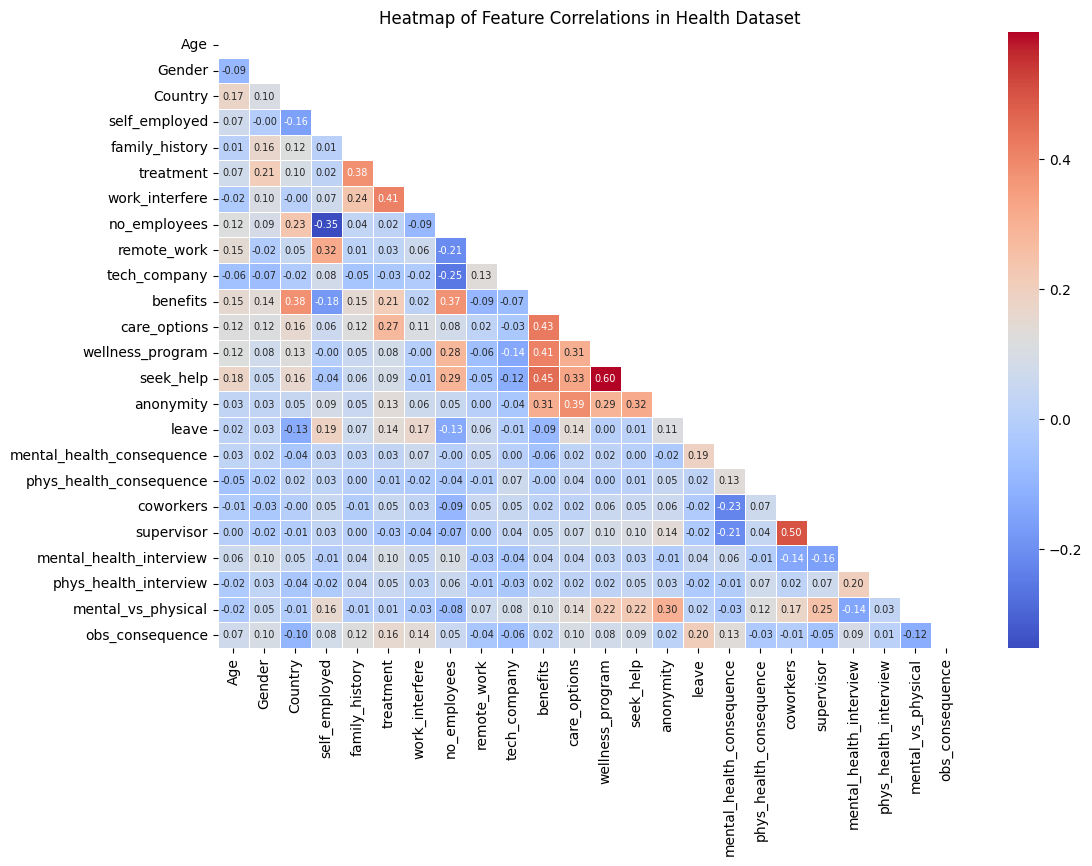

In [21]:
    # Drop correlated feature
health_df = health_clean.drop(columns=['state'])

    # Remove strings before correlation
corr_matrix = health_df.corr()

    # Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,  mask=mask, annot=True, annot_kws={"size": 7}, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations in Health Dataset")
plt.show()

Examine Chi-square

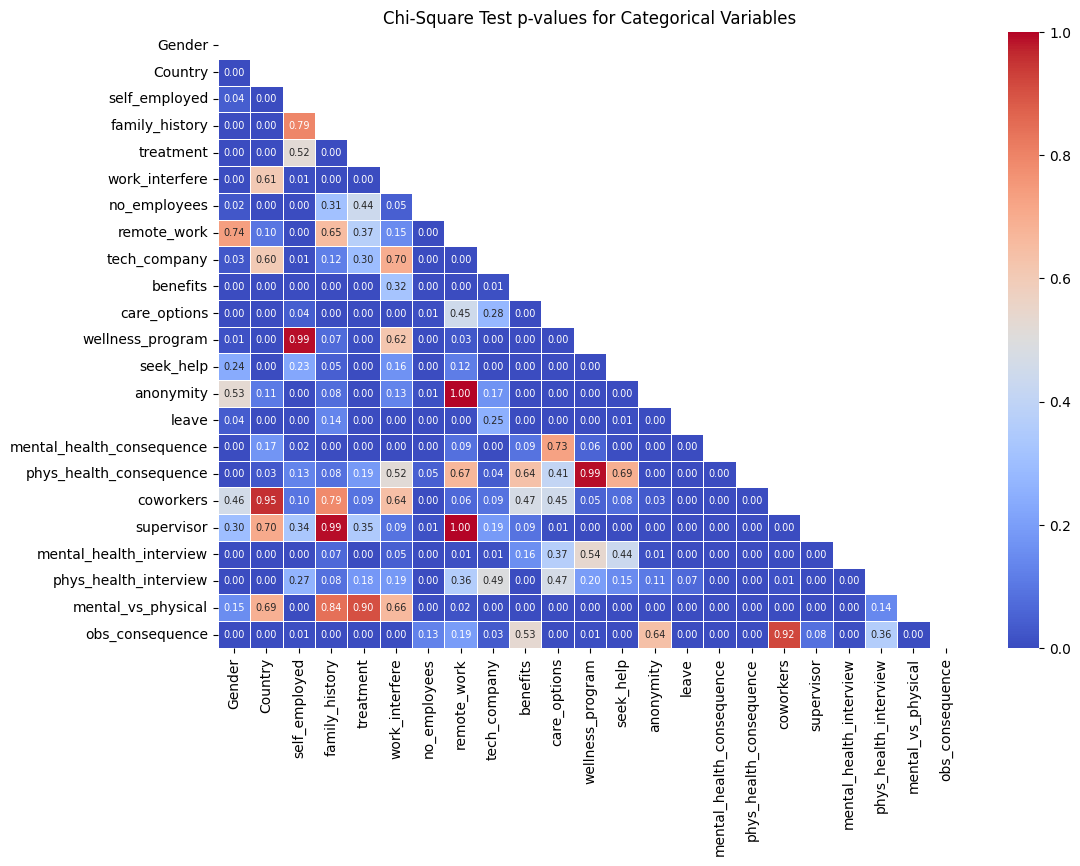

In [24]:
    # Function to calculate Chi-Square p-value
def chi_square_test(x, y):
   """Perform Chi-Square test of independence and return p-value."""
   contingency_table = pd.crosstab(x, y)
   chi2, p, _, _ = stats.chi2_contingency(contingency_table)
   return p

    # Select categorical columns
categorical_columns = health_df.select_dtypes(include=['category']).columns.tolist()

    # Compute Cramér's V and Chi-Square tests for all categorical variable pairs
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1, col2 in itertools.combinations(categorical_columns, 2):
   chi_square_results.loc[col1, col2] = chi_square_test(health_df[col1], health_df[col2])
   chi_square_results.loc[col2, col1] = chi_square_results.loc[col1, col2]

    # Mask the upper triangle
mask = np.triu(np.ones_like(chi_square_results, dtype=bool))

    # Convert results to numeric for readability
chi_square_results = chi_square_results.astype(float)

    # Display the Chi-Square test results heatmap (p-values)
plt.figure(figsize=(12, 8))
sns.heatmap(chi_square_results, mask=mask, annot=True, annot_kws={"size": 7}, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Chi-Square Test p-values for Categorical Variables")
plt.show()

# Encode dummy variables

In [25]:
health_dum = pd.get_dummies(health_df, drop_first=True)
health_dum

,Age,Gender_1,Gender_2,Country_1,self_employed_1,family_history_1,treatment_1,work_interfere_1,work_interfere_2,work_interfere_3,...,phys_health_consequence_1,phys_health_consequence_-1,coworkers_1,supervisor_1,mental_health_interview_1,mental_health_interview_-1,phys_health_interview_1,phys_health_interview_-1,mental_vs_physical_1,obs_consequence_1
0,37,True,False,True,False,False,True,False,False,True,...,False,False,True,True,False,False,False,True,True,False
1,44,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,32,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,True,False,False,False
3,31,False,False,False,False,True,True,False,False,True,...,True,False,True,False,False,True,False,True,False,True
4,31,False,False,True,False,False,False,False,False,False,...,False,False,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,False,False,False,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1255,32,False,False,True,False,True,True,False,False,True,...,False,False,True,True,False,False,False,False,True,False
1256,34,False,False,True,False,True,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1257,46,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Split into train and test sets

In [26]:
    # Define features and target variable
X = health_dum.drop(columns=['treatment_1'])
y = health_dum['treatment_1']

    # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=680)

# Initialize Logistic Regression Model

In [42]:
    # Train model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

    # Run metrics
y_log_predict = log_model.predict(X_test)
y_log_proba = log_model.predict_proba(X_test)[:, 1]
log_cnfsn_matrix = confusion_matrix(y_test, y_log_predict)
log_class_report = classification_report(y_test, y_log_predict)

    # Save metrics for Logistic Regression
log_metrics = {
    "Accuracy": accuracy_score(y_test, y_log_predict),
    "F1 Score": f1_score(y_test, y_log_predict),
    "Precision": precision_score(y_test, y_log_predict),
    "Recall": recall_score(y_test, y_log_predict)}

    # Display
print("\nLog Reg Model Performance:")
print(log_metrics)
print("\nConfusion Matrix:\n", log_cnfsn_matrix)
print("\nClassification Report:\n", log_class_report)


Log Reg Model Performance:
{'Accuracy': 0.75, 'F1 Score': 0.7758007117437722, 'Precision': 0.7956204379562044, 'Recall': 0.7569444444444444}

Confusion Matrix:
 [[ 80  28]
 [ 35 109]]

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.74      0.72       108
        True       0.80      0.76      0.78       144

    accuracy                           0.75       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.75      0.75      0.75       252



# Feature importance

In [43]:
    # Feature Importance (Coefficients), ensure array is 1-dimensional
log_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_.ravel()
}).sort_values(by='Coefficient', ascending=False)

log_features['Odds Ratio'] = np.exp(log_features['Coefficient'])
pd.options.display.float_format = '{:.2f}'.format
print(log_features)

                         Feature  Coefficient  Odds Ratio
8               work_interfere_3         2.51       12.28
7               work_interfere_2         1.65        5.20
5               family_history_1         1.30        3.68
6               work_interfere_1         1.22        3.40
2                       Gender_2         0.95        2.59
14                care_options_1         0.92        2.50
1                       Gender_1         0.69        1.99
13                    benefits_1         0.59        1.80
26                   coworkers_1         0.49        1.64
21                       leave_4         0.47        1.60
20                       leave_3         0.45        1.57
28     mental_health_interview_1         0.37        1.45
30       phys_health_interview_1         0.34        1.41
33             obs_consequence_1         0.28        1.32
23  mental_health_consequence_-1         0.26        1.30
22   mental_health_consequence_1         0.21        1.24
17            

# Re-run the model with selected features

In [44]:
# Identify the features to keep
selected_features = [
    'work_interfere_3',
    'work_interfere_2',
    'family_history_1',
    'work_interfere_1',
    'Gender_2',
    'care_options_1',
    'Gender_1',
    'benefits_1',
    'coworkers_1',
    'leave_4',
    'leave_3',
    'mental_health_interview_1',
    'seek_help_1' # Assuming 'seek_help' corresponds to 'seek_help_1' after dummy encoding
]

# Add the target variable to the list of selected columns
selected_columns = selected_features + ['treatment_1']

health_select = health_dum[selected_columns].copy()

# Split the data
X_select = health_select.drop(columns=['treatment_1'])
y_select = health_select['treatment_1']

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(
    X_select, y_select, test_size=0.2, random_state=680)

# Initialize and train the Logistic Regression model
log_model_select = LogisticRegression(max_iter=500)
log_model_select.fit(X_train_select, y_train_select)

# Evaluate the model
y_log_predict_select = log_model_select.predict(X_test_select)
log_cnfsn_matrix_select = confusion_matrix(y_test_select, y_log_predict_select)
log_class_report_select = classification_report(y_test_select, y_log_predict_select)

# Display the metrics
print("\nLog Reg Model Performance with Selected Features:")
print("Accuracy:", accuracy_score(y_test_select, y_log_predict_select))
print("F1 Score:", f1_score(y_test_select, y_log_predict_select))
print("Precision:", precision_score(y_test_select, y_log_predict_select))
print("Recall:", recall_score(y_test_select, y_log_predict_select))
print("\nConfusion Matrix:\n", log_cnfsn_matrix_select)
print("\nClassification Report:\n", log_class_report_select)


Log Reg Model Performance with Selected Features:
Accuracy: 0.7619047619047619
F1 Score: 0.7902097902097902
Precision: 0.795774647887324
Recall: 0.7847222222222222

Confusion Matrix:
 [[ 79  29]
 [ 31 113]]

Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.73      0.72       108
        True       0.80      0.78      0.79       144

    accuracy                           0.76       252
   macro avg       0.76      0.76      0.76       252
weighted avg       0.76      0.76      0.76       252



END

In [45]:
import joblib
joblib.dump(log_model_select, 'Final.pkl')


['Final.pkl']